In [30]:
import pandas as pd
food_demand_forecasting_file = '../input/food-demand-forecasting/train.csv'
food_demand_forecasting_data = pd.read_csv(food_demand_forecasting_file)

In [31]:
food_demand_forecasting_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [32]:
food_demand_forecasting_data.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [33]:
y = food_demand_forecasting_data.checkout_price

In [34]:
food_demand_forecasting_features = ['checkout_price', 'base_price','num_orders']

In [35]:
X = food_demand_forecasting_data[food_demand_forecasting_features]

In [36]:
X.describe()

,checkout_price,base_price,num_orders
count,456548.000000,456548.000000,456548.000000
mean,332.238933,354.156627,261.872760
std,152.939723,160.715914,395.922798
min,2.970000,55.350000,13.000000
25%,228.950000,243.500000,54.000000
50%,296.820000,310.460000,136.000000
75%,445.230000,458.870000,324.000000
max,866.270000,866.270000,24299.000000


In [37]:
X.head()


,checkout_price,base_price,num_orders
0,136.83,152.29,177
1,136.83,135.83,270
2,134.86,135.86,189
3,339.50,437.53,54
4,243.50,242.50,40


In [38]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
food_demand_forecasting_model = DecisionTreeRegressor(random_state=1)

# Fit model
food_demand_forecasting_model.fit(X, y)


DecisionTreeRegressor(random_state=1)

In [39]:
#Print time
print("Making predictions for the food-demand-forecasting:")
print(X.head())
print("The predictions are")
print(food_demand_forecasting_model.predict(X.head()))


Making predictions for the food-demand-forecasting:
   checkout_price  base_price  num_orders
0          136.83      152.29         177
1          136.83      135.83         270
2          134.86      135.86         189
3          339.50      437.53          54
4          243.50      242.50          40
The predictions are
[136.83 136.83 134.86 339.5  243.5 ]


In [40]:
#
from sklearn.metrics import mean_absolute_error

predicted_food_demand_forecasting = food_demand_forecasting_model.predict(X)
mean_absolute_error(y, predicted_food_demand_forecasting)


7.35991566805705e-12

In [41]:
#
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
food_model = DecisionTreeRegressor()
# Fit model
food_demand_forecasting_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = food_demand_forecasting_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


0.0006735764970425762


In [42]:
#
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)



In [43]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))



Max leaf nodes: 5  		 Mean Absolute Error:  25
Max leaf nodes: 50  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [44]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores, key=scores.get)




In [45]:
#
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [46]:
#
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))




Validation MAE for Random Forest Model: 0.00029184051098288613


In [47]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt # plotting

In [48]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [49]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 376.88
|   |--- feature_0 <= 222.65
|   |   |--- feature_0 <= 157.65
|   |   |   |--- value: [130.23]
|   |   |--- feature_0 >  157.65
|   |   |   |--- value: [184.62]
|   |--- feature_0 >  222.65
|   |   |--- feature_0 <= 285.69
|   |   |   |--- value: [257.33]
|   |   |--- feature_0 >  285.69
|   |   |   |--- value: [313.42]
|--- feature_0 >  376.88
|   |--- feature_0 <= 544.18
|   |   |--- feature_0 <= 454.47
|   |   |   |--- value: [419.79]
|   |   |--- feature_0 >  454.47
|   |   |   |--- value: [488.98]
|   |--- feature_0 >  544.18
|   |   |--- feature_0 <= 650.42
|   |   |   |--- value: [609.43]
|   |   |--- feature_0 >  650.42
|   |   |   |--- value: [691.22]



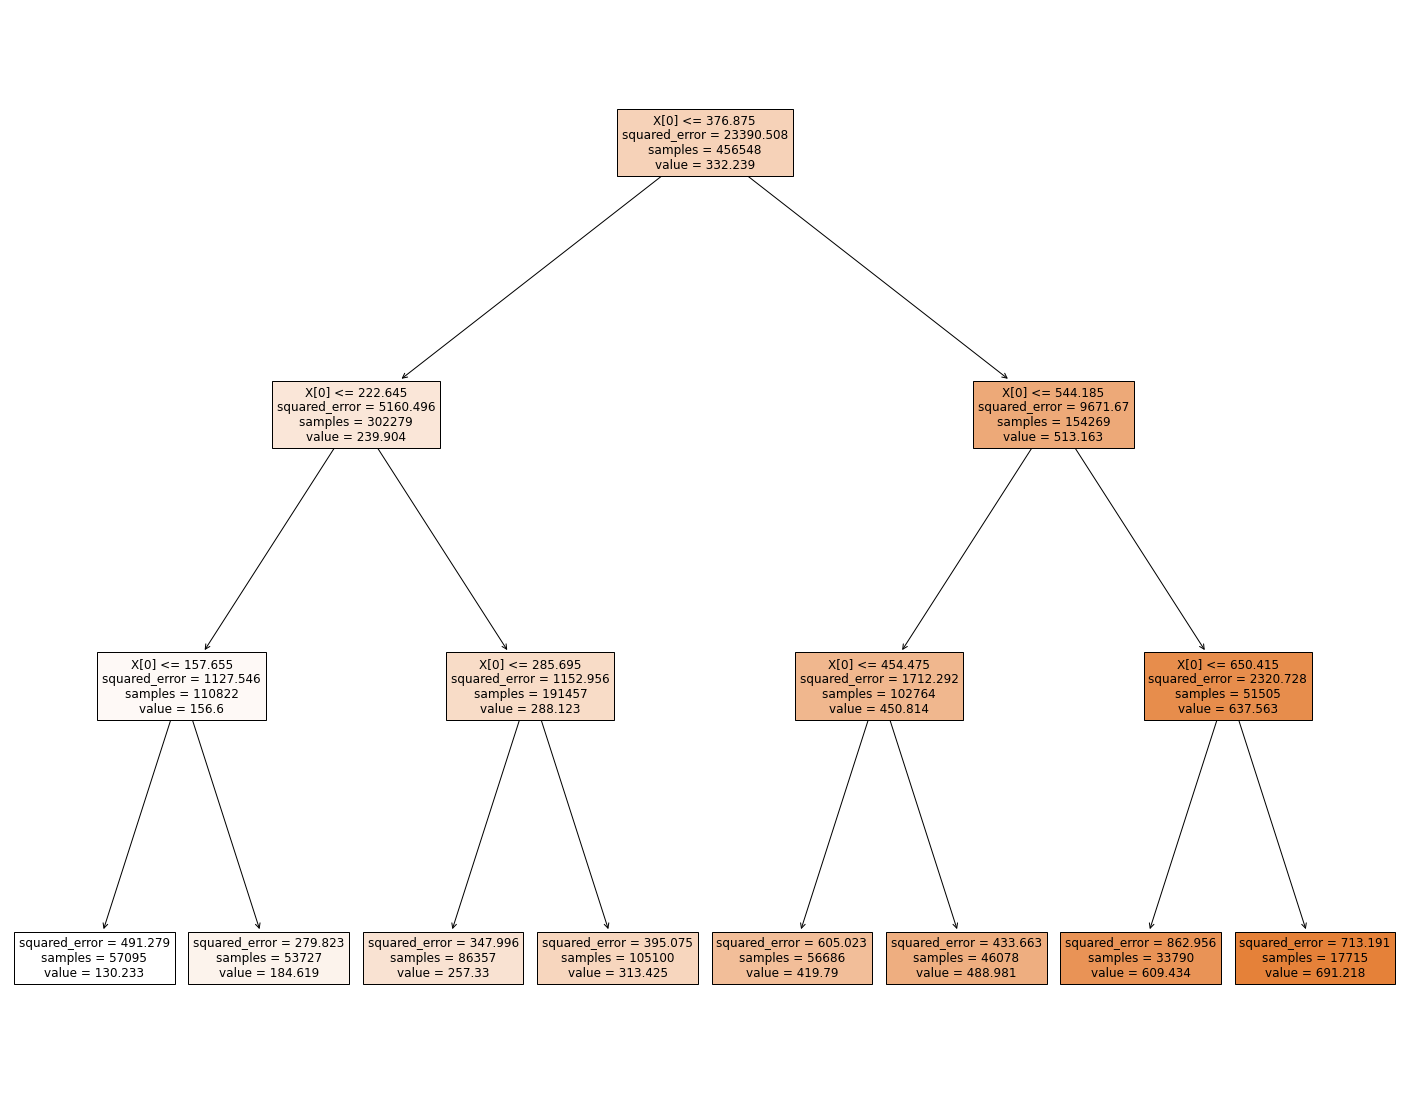

In [50]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [52]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [53]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [54]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



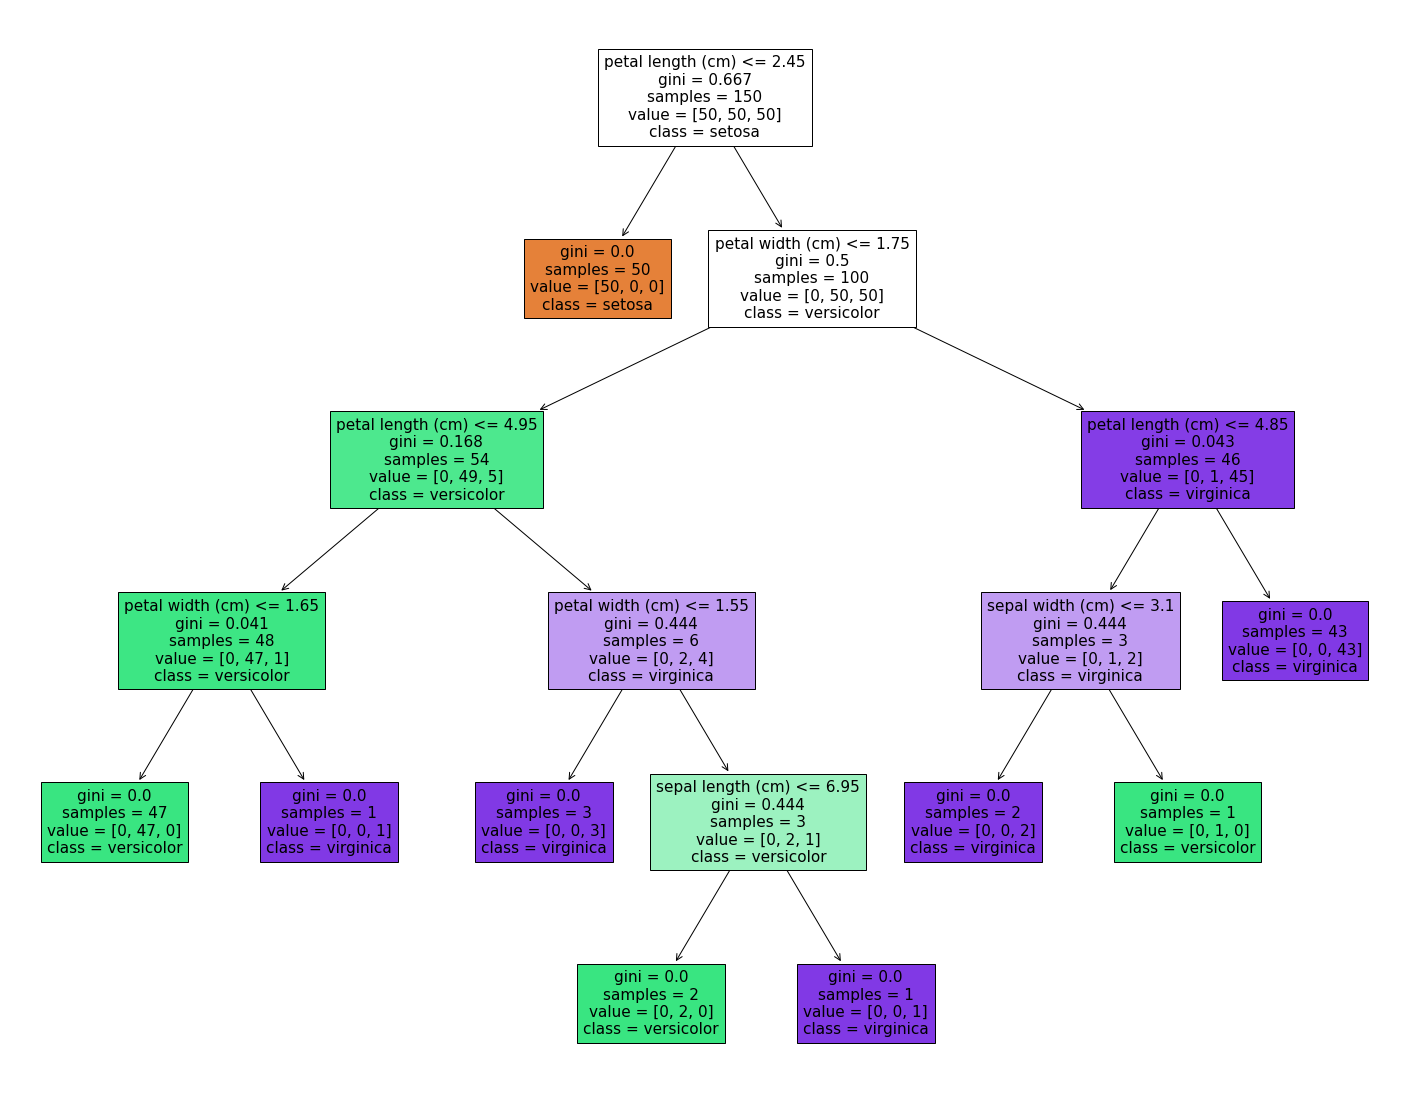

In [55]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [56]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

In [57]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



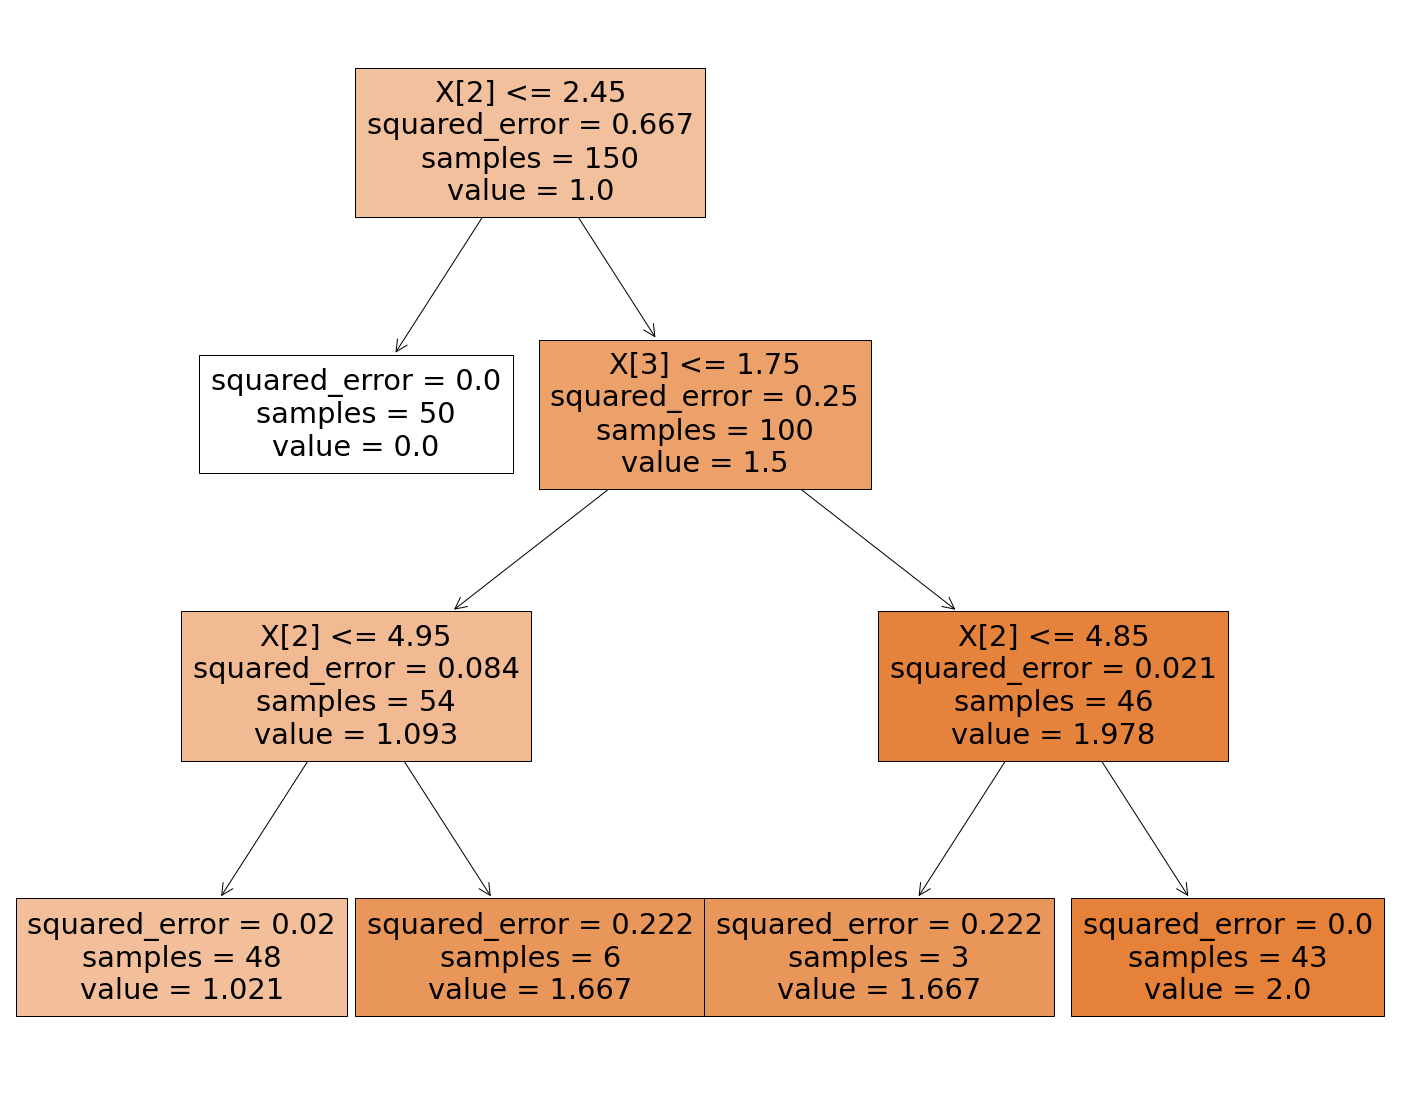

In [58]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)